<a href="https://colab.research.google.com/github/goldboy225/Intelligent-IoT-Security-Frameworks/blob/main/NSL_KDD_Framework_Pipeline_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Data Collection

## 1.1 Import libraries

In [ ]:
# data cleaning and plots
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

# sklearn: data preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
import missingno

# sklearn: train model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_validate, StratifiedKFold
from sklearn.metrics import precision_recall_curve, precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix, classification_report, plot_roc_curve

# sklearn classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

# optimization algorithms
from sklearn.model_selection import GridSearchCV
import itertools
import matplotlib.gridspec as gridspec 

# timestamp for noting time resource operation
from pandas import Timestamp

# os lib
import os  # print ("current directory : %s" % os.getcwd())

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

## 1.2 Load the dataset

In [ ]:
# load the original dataset

df = pd.read_csv('/content/drive/MyDrive/Datasets/NSL-KDD/KDDTrain+.txt')
df_test = pd.read_csv('/content/drive/MyDrive/Datasets/NSL-KDD/KDDTest+.txt')

## 1.3 Data Sanity Check and basic transformation

In [ ]:
# Check the dataframe

df.head()

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,0.17.1,0.03,0.17.2,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


The data set doesn't include column names, so let's add them.

In [ ]:
# attach the column names to the dataset
col_names = (['duration','protocol_type','service','flag','src_bytes','dst_bytes','land',\
            'wrong_fragment','urgent','hot','num_failed_logins','logged_in','num_compromised', \
            'root_shell','su_attempted','num_root','num_file_creations','num_shells', \
            'num_access_files','num_outbound_cmds','is_host_login','is_guest_login', \
            'count','srv_count','serror_rate','srv_serror_rate','rerror_rate', \
            'srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate', \
            'dst_host_count','dst_host_srv_count','dst_host_same_srv_rate', \
            'dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate', \
            'dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate', \
            'dst_host_srv_rerror_rate','label', 'level'])

df = pd.read_csv('/content/drive/MyDrive/Datasets/NSL-KDD/KDDTrain+.txt', header=None, names = col_names)
df_test = pd.read_csv('/content/drive/MyDrive/Datasets/NSL-KDD/KDDTest+.txt', header=None, names = col_names)

# remove the "difficulty level" column since it has no use.
df = df.drop(columns=['level'], axis=1)
df_test = df_test.drop(columns=['level'], axis=1)

#df.columns = columns
#test_df.columns = columns

# sanity check
#df.head().T

# shape, this gives the dimensions of the dataset
print('Dimensions of the Training set:',df.shape)
print('Dimensions of the Test set:',df_test.shape)

Dimensions of the Training set: (125973, 42)
Dimensions of the Test set: (22544, 42)


In [ ]:
df.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [ ]:
# Statistic summary
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,...,182.148945,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,...,99.206213,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Check label distribution
print('Label distribution Training set:')
print(df['label'].value_counts())
print()
print('Label distribution Test set:')
print(df_test['label'].value_counts())

Label distribution Training set:
normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: label, dtype: int64

Label distribution Test set:
normal             9711
neptune            4657
guess_passwd       1231
mscan               996
warezmaster         944
apache2             737
satan               735
processtable        685
smurf               665
back                359
snmpguess           331
saint               319
mailbomb            293
snmpgetattack       178


# 2. Exploration Data Analysis (EDA)

## 2.1 Check the count and distribution of target classes

In [ ]:
# to install matplotlib in order to show the figure in the following steps

#! python -m pip uninstall matplotlib
#! pip install matplotlib==3.1.3


# Check the count of normal and attack class

counts = df.value_counts('attack')
print(counts)

attack
normal             67342
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
dtype: int64


In [ ]:
# Check the count of level class

counts = df.value_counts('level')
print(counts)

level
21    62557
18    20667
20    19338
19    10284
15     3990
17     3074
16     2393
12      729
14      674
11      641
13      451
10      253
9       194
7       118
8       106
6        96
5        81
4        79
0        66
3        65
1        62
2        54
dtype: int64


Not sure the meaning of the level feature.

In [ ]:
# Check the count of level class

counts = df.value_counts('attack_map')
print(counts)

attack_map
0    67351
1    45927
2    11656
4      995
3       43
dtype: int64


AttributeError: ignored

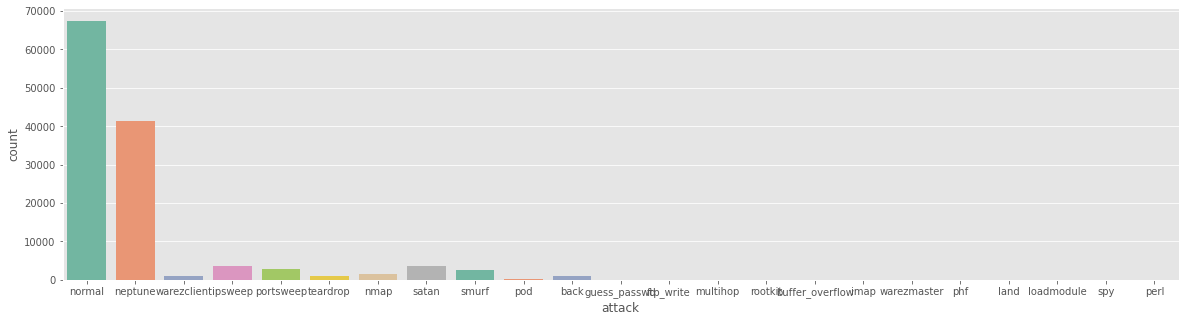

In [ ]:
# let's see the distribution of our target normal/attack by bar chart

plt.figure(figsize=(20,5))
ax = sns.countplot(x = 'attack', data = df, palette = 'Set2')
for container in ax.containers:
    ax.bar_label(container)

AttributeError: ignored

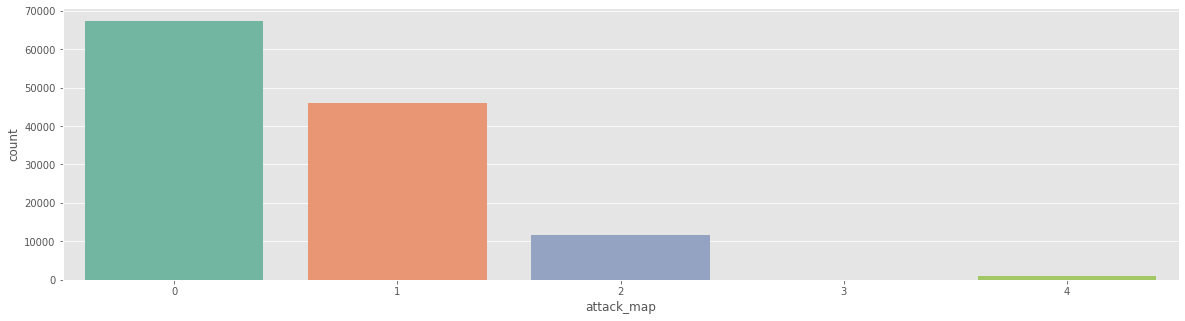

In [ ]:
# let's see the distribution of our target normal/attack by bar chart

plt.figure(figsize=(20,5))
ax = sns.countplot(x = 'attack_map', data = df, palette = 'Set2')
for container in ax.containers:
    ax.bar_label(container)

In [ ]:
# use a crosstab to get attack vs protocol

attack_vs_protocol = pd.crosstab(df.attack, df.protocol_type)
attack_vs_protocol

protocol_type,icmp,tcp,udp
attack,,,
back,0,956,0
buffer_overflow,0,30,0
ftp_write,0,8,0
guess_passwd,0,53,0
imap,0,11,0
ipsweep,3117,482,0
land,0,18,0
loadmodule,0,9,0
multihop,0,7,0


In [ ]:
# helper function for drawing mulitple charts.

def bake_pies(data_list,labels):
    list_length = len(data_list)
    
    # setup for mapping colors
    color_list = sns.color_palette()
    color_cycle = itertools.cycle(color_list)
    cdict = {}
    
    # build the subplots
    fig, axs = plt.subplots(1, list_length,figsize=(16,5), tight_layout=False)
    plt.subplots_adjust(wspace=1/list_length)
    
    # loop through the data sets and build the charts
    for count, data_set in enumerate(data_list): 
        # update our color mapt with new values
        for num, value in enumerate(np.unique(data_set.index)):
            if value not in cdict:
                cdict[value] = next(color_cycle)
       
        # build the wedges
        wedges,texts = axs[count].pie(data_set,
                           colors=[cdict[v] for v in data_set.index])

        # build the legend
        axs[count].legend(wedges, data_set.index,
                           title="Flags",
                           loc="center left",
                           bbox_to_anchor=(1, 0, 0.5, 1))
        # set the title
        axs[count].set_title(labels[count])
        
    return axs

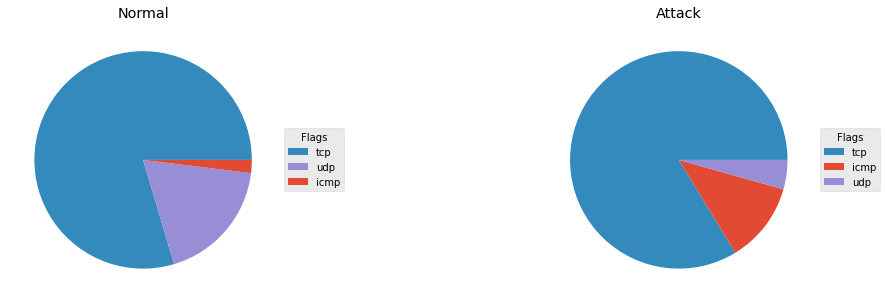

In [ ]:
# Use pie chart to show the distribution of the target classes based on the protocols

normal_protocol = df.loc[df.attack_map == 0].protocol_type.value_counts()
attack_protocol = df.loc[df.attack_map != 0].protocol_type.value_counts()

protocol_axs = bake_pies([normal_protocol, attack_protocol], ['Normal','Attack'])
plt.show()

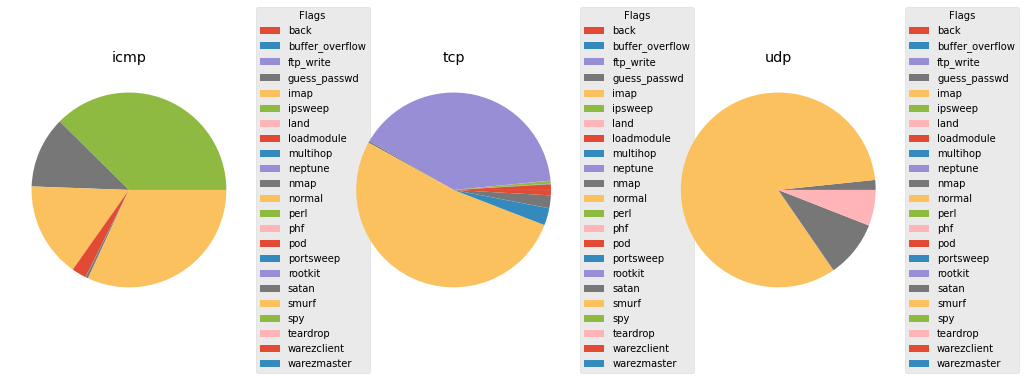

In [ ]:
# Use pie chart to show the distribution of the attacks based on the protocols

# get the series for each protocol
icmp_attacks = attack_vs_protocol.icmp
tcp_attacks = attack_vs_protocol.tcp
udp_attacks = attack_vs_protocol.udp

# create the charts
bake_pies([icmp_attacks, tcp_attacks, udp_attacks],['icmp','tcp','udp'])
plt.show()

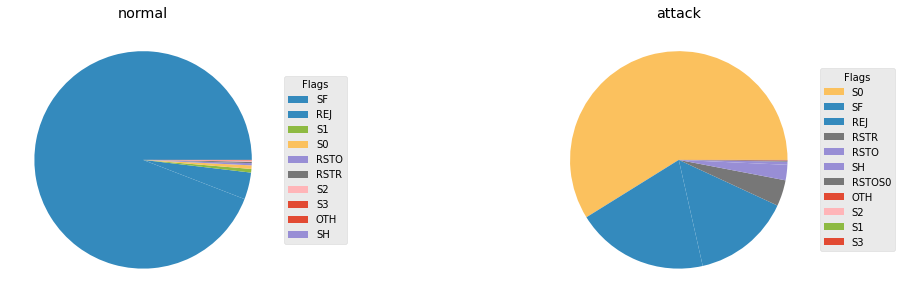

In [ ]:
# Use pie chart to show the distribution of the attacks based on the flags

# get a series with the count of each flag for attack and normal traffic
normal_flags = df.loc[df.attack_map == 0].flag.value_counts()
attack_flags = df.loc[df.attack_map != 0].flag.value_counts()

# create the charts
flag_axs = bake_pies([normal_flags, attack_flags], ['normal','attack'])        
plt.show()

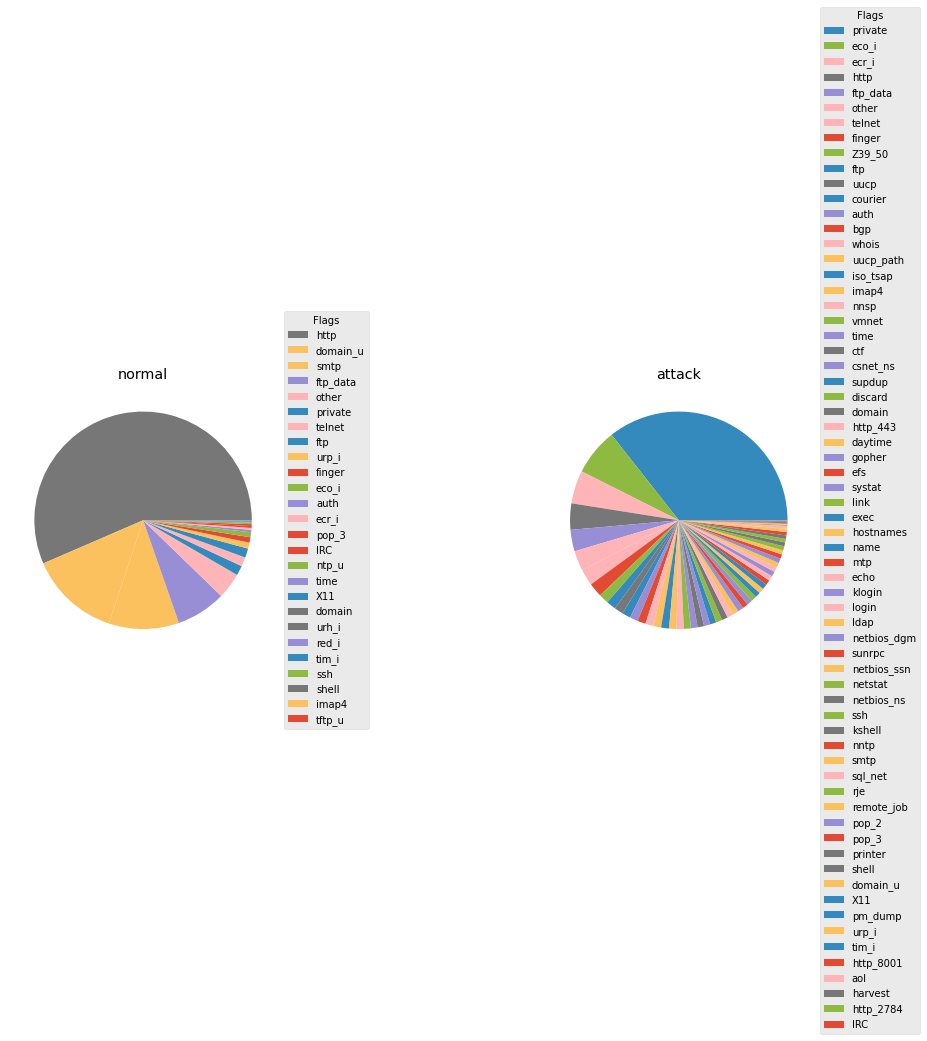

In [ ]:
# Use pie chart to show the distribution of the attacks based on the services

# get a series with the count of each service for attack and normal traffic
normal_services = df.loc[df.attack_map == 0].service.value_counts()
attack_services = df.loc[df.attack_map != 0].service.value_counts()

# create the charts
service_axs = bake_pies([normal_services, attack_services], ['normal','attack'])        
plt.show()

Wow! Look at how many services are in the attack set! Whereas a huge amount of normal traffic is http, our attack traffic is all over the place. That is interesting as it means that attacks are searching for many different paths into systems--some well traveled and some not. 

If we think about this from the eyes of a network adminstrator, the combination of protocol, flag and service seem like they should tell us a lot about the nature of our traffic. Coupling them with the duration of a connection and the amount of data in that connection seems like a good starting point for us.

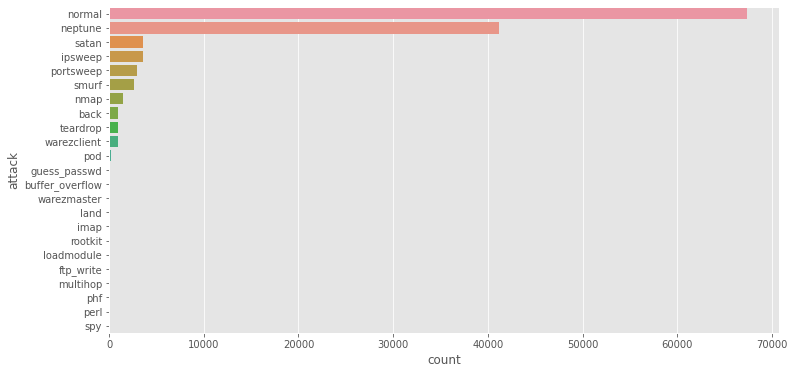

In [ ]:
# let's see the target classses using another bar chart

plt.figure(figsize=(12,6))
sns.countplot(y='attack' , data=df, order = df['attack'].value_counts().index)

## 2.2 Check the corrlelation between variables

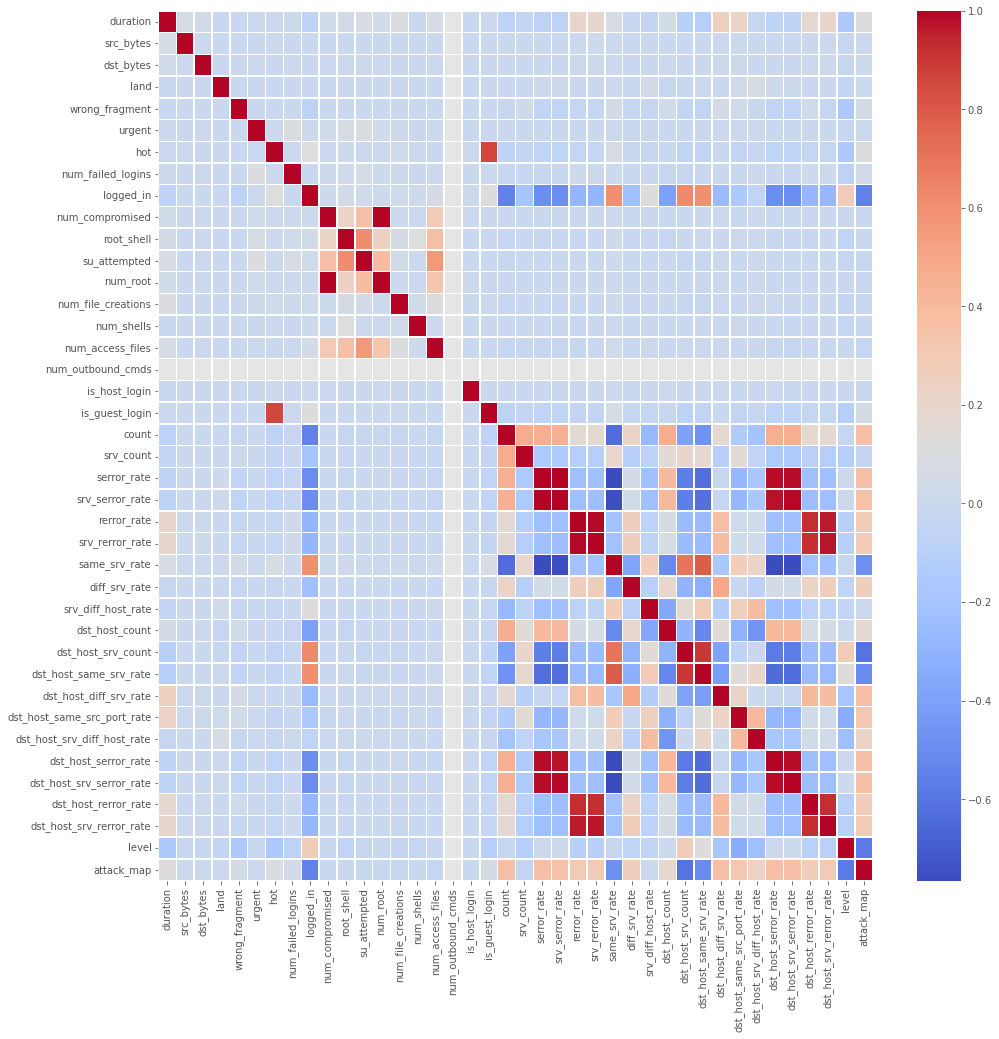

In [ ]:
# Check the correlation matrix between among the attributes

corr = df.corr()
#sns.heatmap(corr, annot=True, cmap='coolwarm')

fig, ax = plt.subplots(figsize=(16,16))         # Sample figsize in inches
sns.heatmap(corr, annot = False, cmap='coolwarm', linewidths=.5, ax=ax)

AttributeError: ignored

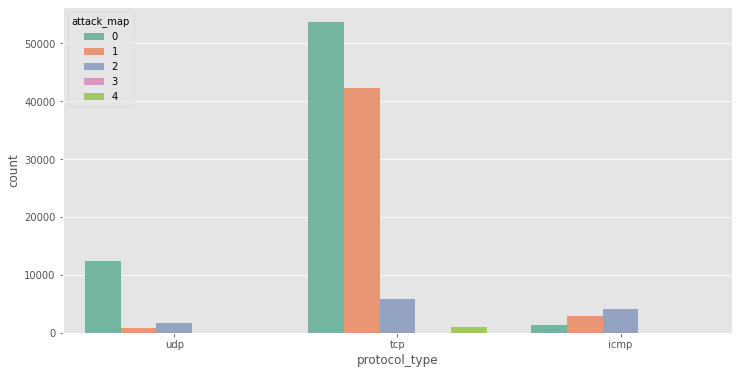

In [ ]:
# let's see protocol type vs. our target(attack) by bar chart

plt.figure(figsize=(12,6))
ax = sns.countplot(x='protocol_type', hue='attack_map', data = df, palette ='Set2')
for container in ax.containers:
    ax.bar_label(container)

## 2.3 Check the distribution for the features

In [ ]:
# Define history plot function for statistic features

def plot_hist(df, cols, title):
    grid = gridspec.GridSpec(10, 2, wspace=0.5, hspace=0.5) 
    fig = plt.figure(figsize=(20,30)) 
    
    for n, col in enumerate(df[cols]):         
        ax = plt.subplot(grid[n]) 

        ax.hist(df[col], bins=20) 
        #ax.set_ylabel('Count', fontsize=12)
        ax.set_title(f'{col} distribution', fontsize=15) 
    fig.suptitle(title, fontsize=20)
    grid.tight_layout(fig, rect=[0, 0, 1, 0.97])
    plt.show()

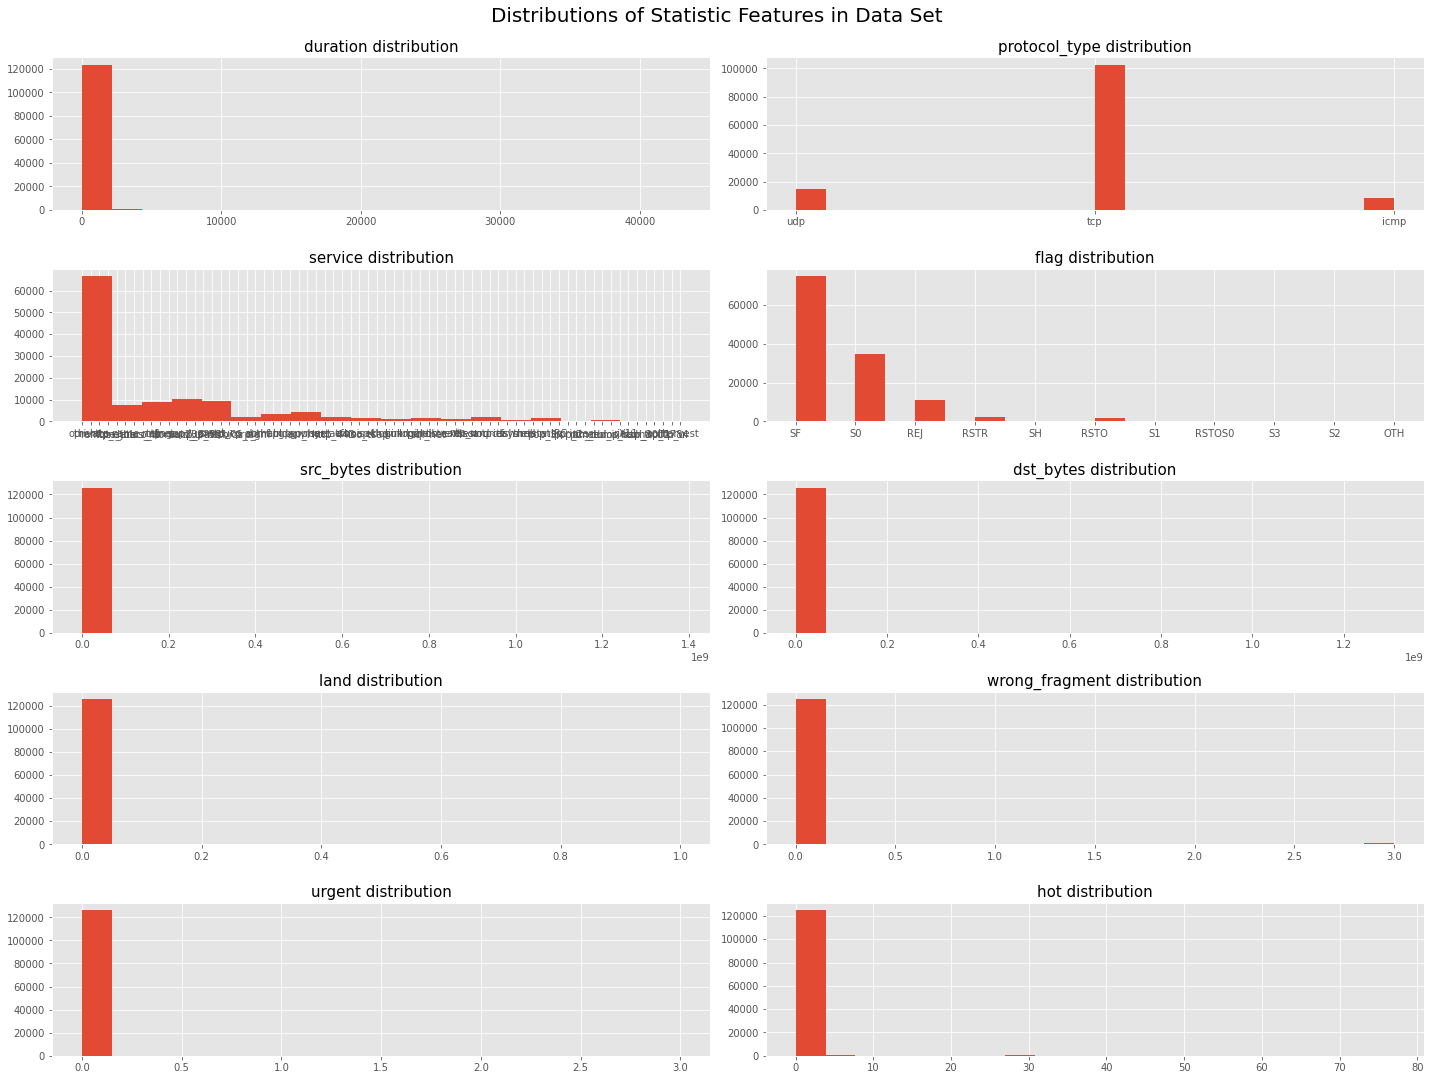

In [ ]:
# using plot_hist function to present plot history of selected statistic features

hist_cols = [ 'duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot' 
#              'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', \
#              'su_attempted', 'num_root', 'num_file_creations', 'num_shells',  \
#              'num_access_files', 'num_outbound_cmds', 'is_host_login',  \
#              'is_guest_login', 'count', 'srv_count', 'serror_rate', \
#              'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',  \
#              'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', \
#              'dst_host_srv_count', 'dst_host_same_srv_rate',  \
#              'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', \
#              'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', \
#              'dst_host_srv_serror_rate', 'dst_host_rerror_rate', \
#              'dst_host_srv_rerror_rate'
            ]
    
plot_hist(df, hist_cols, 'Distributions of Statistic Features in Data Set')

ValueError: ignored

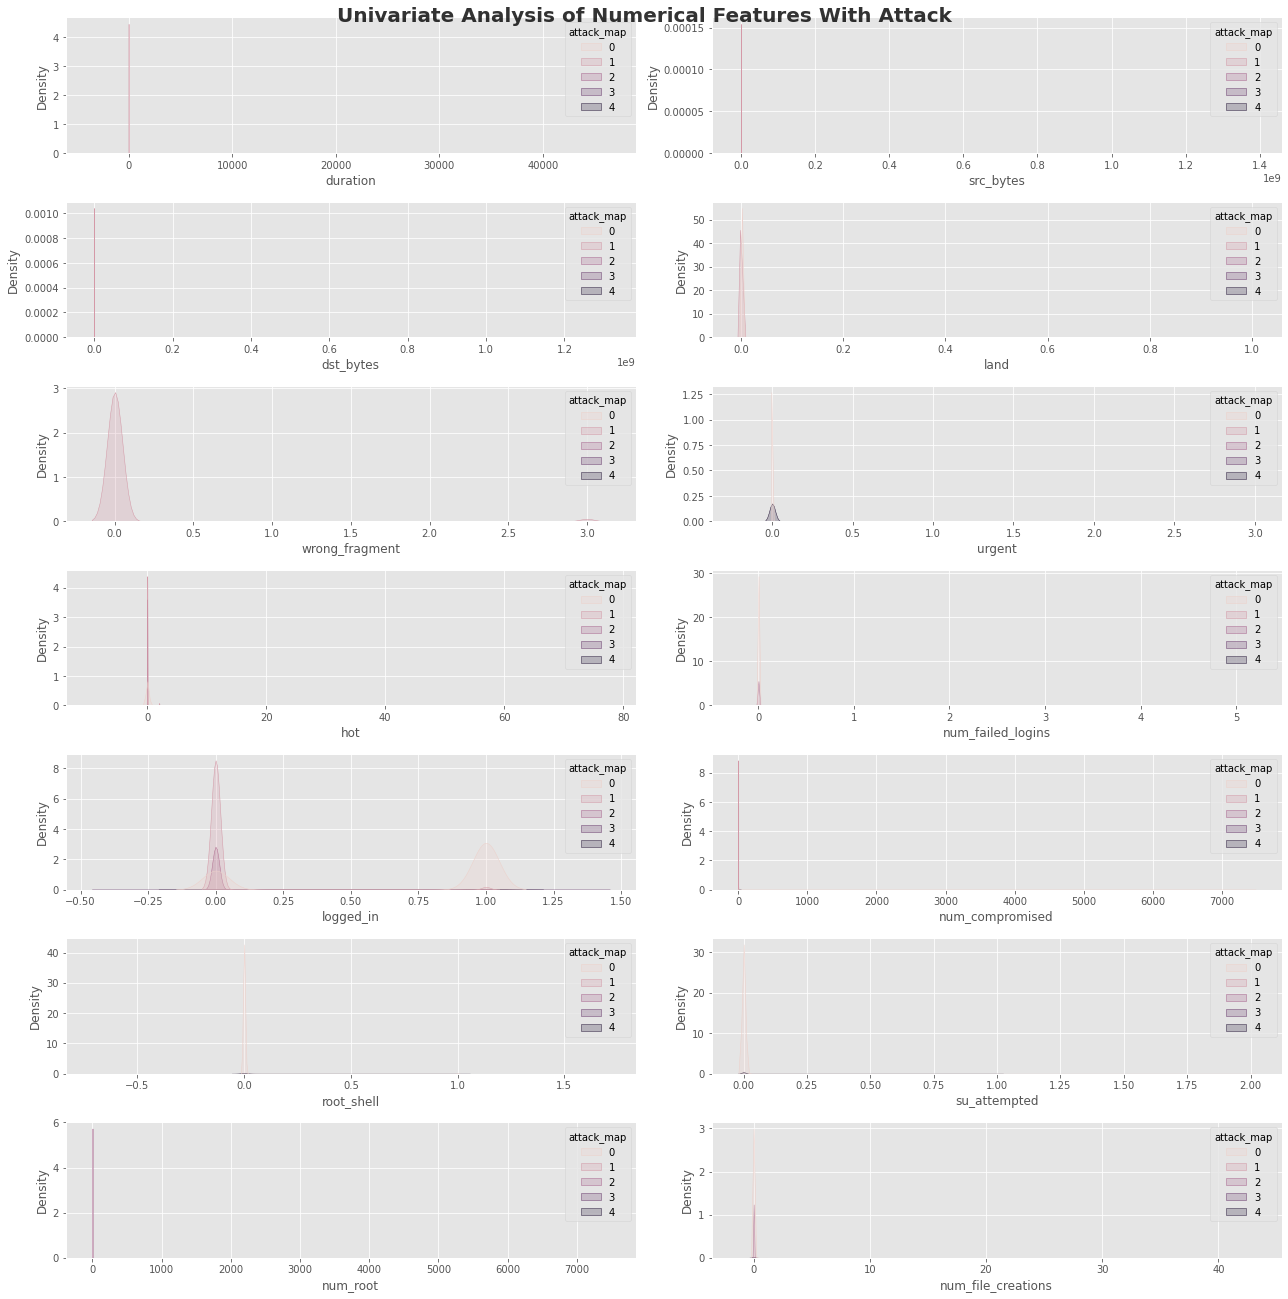

In [ ]:
# Check distribution of each feature towards attack

numeric_features = [i for i in df.columns if df[i].dtype!='O']
categorical_features = [i for i in df.columns if df[i].dtype =='O']

plt.figure(figsize=(18,18))
plt.suptitle('Univariate Analysis of Numerical Features With Attack', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(7, 2, i+1)
    sns.kdeplot(x= df[numeric_features[i]], shade=True, hue='attack_map' ,data=df)
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

In [ ]:
for i in df.columns:
    plt.figure(figsize=(18,18))
    sns.displot(data= df,x=i,hue='label',kind='hist')

## 2.4 Check the outlier of each feature

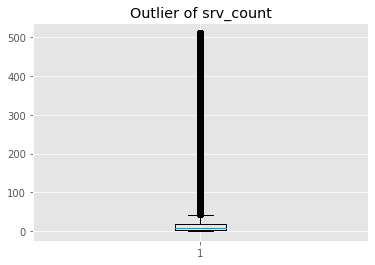

In [ ]:
#plot the outlier of the feature

plt.boxplot(df['srv_count'])
plt.title('Outlier of srv_count')
plt.show()

# 3. Data Pre-processing

## 3.1 Handle missing value#

In [ ]:
# check the count of missing value

df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [ ]:
# check the count of missing value

df.isna().sum()

ts                        0
src_ip                    0
src_port                  0
dst_ip                    0
dst_port                  0
proto                     0
service                   0
duration                  0
src_bytes                 0
dst_bytes                 0
conn_state                0
missed_bytes              0
src_pkts                  0
src_ip_bytes              0
dst_pkts                  0
dst_ip_bytes              0
dns_query                 0
dns_qclass                0
dns_qtype                 0
dns_rcode                 0
dns_AA                    0
dns_RD                    0
dns_RA                    0
dns_rejected              0
ssl_version               0
ssl_cipher                0
ssl_resumed               0
ssl_established           0
ssl_subject               0
ssl_issuer                0
http_trans_depth          0
http_method               0
http_uri                  0
http_version              0
http_request_body_len     0
http_response_body_l

In [ ]:
# show the features that contain '-' value, which can be regarded as missing value

features_with_missing_value = df.columns[df.isin(['-']).any()]
features_with_missing_value

Index(['service', 'dns_query', 'dns_AA', 'dns_RD', 'dns_RA', 'dns_rejected',
       'ssl_version', 'ssl_cipher', 'ssl_resumed', 'ssl_established',
       'ssl_subject', 'ssl_issuer', 'http_trans_depth', 'http_method',
       'http_uri', 'http_version', 'http_user_agent', 'http_orig_mime_types',
       'http_resp_mime_types', 'weird_name', 'weird_addl', 'weird_notice'],
      dtype='object')

In [ ]:
# show the instances that contain '-' value, which can be regarded as missing value

#df[df.isin(['-'])]
#df[df == '-']

In [ ]:
# Check the value counts for the features

df["service"].value_counts()

-             280216
dns           116480
http           60720
ssl             2070
ftp             1065
gssapi           184
dce_rpc          136
smb              108
dhcp              46
smb;gssapi        18
Name: service, dtype: int64

In [ ]:
# Check the value counts for the features

df["dns_query"].value_counts()

-                                                  366019
a2z3kk2ebqzso7.iot.ap-southeast-2.amazonaws.com     13700
arpa.whois-servers.net                               2198
_sleep-proxy._udp.local                              2187
testphp.vulnweb.com                                  1848
                                                    ...  
94.157.81.140.in-addr.arpa                              1
125.48.34.73.in-addr.arpa                               1
101.192.178.247.in-addr.arpa                            1
254.68.212.in-addr.arpa                                 1
loadm.exelator.com                                      1
Name: dns_query, Length: 14149, dtype: int64

In [ ]:
# Check the value counts for the features

df["dns_AA"].value_counts()

-    365158
F     81279
T     14606
Name: dns_AA, dtype: int64

In [ ]:
# Check the value counts for the features

df["dns_RD"].value_counts()

-    365158
F     63106
T     32779
Name: dns_RD, dtype: int64

In [ ]:
# Check the value counts for the features

df["dns_rejected"].value_counts()

-    365158
F     89392
T      6493
Name: dns_rejected, dtype: int64

In [ ]:
# Check the value counts for the features

df["ssl_version"].value_counts()

-         460737
TLSv12       188
TLSv13       116
TLSv10         2
Name: ssl_version, dtype: int64

In [ ]:
# Check the value counts for the features

df["ssl_cipher"].value_counts()

-                                          460737
TLS_ECDHE_RSA_WITH_AES_128_GCM_SHA256         176
TLS_AES_128_GCM_SHA256                        116
TLS_ECDHE_RSA_WITH_AES_256_GCM_SHA384          11
TLS_ECDHE_RSA_WITH_AES_256_CBC_SHA              2
TLS_ECDHE_ECDSA_WITH_AES_128_GCM_SHA256         1
Name: ssl_cipher, dtype: int64

In [ ]:
# Check the value counts for the features

df["ssl_resumed"].value_counts()

-    460352
F       605
T        86
Name: ssl_resumed, dtype: int64

In [ ]:
# Check the value counts for the features

df["ssl_established"].value_counts()

-    460352
F       596
T        95
Name: ssl_established, dtype: int64

In [ ]:
# Check the value counts for the features

df["ssl_subject"].value_counts()


-                                                                                           461034
CN=*.wns.windows.com                                                                             4
CN=Mr Shepherd;OU=Security Shepherd Project;O=OWASP;L=Dublin;ST=Ireland;C=IE                     2
CN=settings-win.data.microsoft.com;OU=WSE;O=Microsoft;L=Redmond;ST=WA;C=US                       1
CN=sls.update.microsoft.com;OU=DSP;O=Microsoft;L=Redmond;ST=WA;C=US                              1
CN=*.events.data.microsoft.com;OU=Microsoft;O=Microsoft Corporation;L=Redmond;ST=WA;C=US         1
Name: ssl_subject, dtype: int64

In [ ]:
# Check the value counts for the features

df["ssl_issuer"].value_counts()


-                                                                                                461034
CN=Microsoft IT TLS CA 5;OU=Microsoft IT;O=Microsoft Corporation;L=Redmond;ST=Washington;C=US         4
CN=Microsoft Secure Server CA 2011;O=Microsoft Corporation;L=Redmond;ST=Washington;C=US               2
CN=Mr Shepherd;OU=Security Shepherd Project;O=OWASP;L=Dublin;ST=Ireland;C=IE                          2
CN=Microsoft Update Secure Server CA 2.1;O=Microsoft Corporation;L=Redmond;ST=Washington;C=US         1
Name: ssl_issuer, dtype: int64

In [ ]:
# Check the value counts for the features

df["http_trans_depth"].value_counts()

-     460796
1        214
2         25
10         1
3          1
4          1
5          1
6          1
7          1
8          1
9          1
Name: http_trans_depth, dtype: int64

In [ ]:
# Check the value counts for the features

df["http_method"].value_counts()

-       460809
GET        215
POST        15
HEAD         4
Name: http_method, dtype: int64

In [ ]:
# Check the value counts for the features

df["http_uri"].value_counts()


-                                                                                                                                                                                         460809
/no_nonce_string/                                                                                                                                                                             15
/dvwa/login.php-r                                                                                                                                                                             13
/no_nonce_string/ContentDirectory/scpd.xml                                                                                                                                                    12
/filestreamingservice/files/1f41d40e-6e49-42f0-a4dc-3d35029e2a5d?P1=1554315773&P2=402&P3=2&P4=D2MtshBIyXICLz+f8ls5Sa4mWcxA1B670oj1WRainhnd91v77n9XO6/xoc4QeEYZdwdKSG+6cFNvkBVYbJdXpw==         9
                                   

In [ ]:
# Check the value counts for the features

df["http_version"].value_counts()


-      460801
1.1       242
Name: http_version, dtype: int64

In [ ]:
# Check the value counts for the features

df["http_user_agent"].value_counts()

-                                                                                                                                    460809
Microsoft-Delivery-Optimization/10.0                                                                                                     57
Microsoft-Windows/10.0 UPnP/1.0                                                                                                          32
Ruby                                                                                                                                     31
DAFUPnP                                                                                                                                  19
User-Agent: Microsoft-DLNA DLNADOC/1.50                                                                                                  19
Windows-Update-Agent/10.0.10011.16384 Client-Protocol/1.91                                                                               11
MICROSOFT_DEVICE_MET

In [ ]:
# Check the value counts for the features

df["http_orig_mime_types"].value_counts()

-                       461029
application/xml              8
application/soap+xml         6
Name: http_orig_mime_types, dtype: int64

In [ ]:
# Check the value counts for the features

df["http_resp_mime_types"].value_counts()

-                                    460883
application/xml                          63
text/html                                41
image/png                                15
application/vnd.ms-cab-compressed        13
text/plain                               11
application/ocsp-response                 8
text/json                                 4
image/jpeg                                4
application/x-debian-package              1
Name: http_resp_mime_types, dtype: int64

In [ ]:
# Check the value counts for the features

df["weird_name"].value_counts()

-                                   459749
DNS_RR_unknown_type                    753
active_connection_reuse                275
data_before_established                109
bad_UDP_checksum                        68
bad_TCP_checksum                        52
connection_originator_SYN_ack           20
above_hole_data_without_any_acks         6
inappropriate_FIN                        3
dnp3_corrupt_header_checksum             3
possible_split_routing                   3
TCP_ack_underflow_or_misorder            2
Name: weird_name, dtype: int64

In [ ]:
# Check the value counts for the features

df["weird_addl"].value_counts()


-     460290
46       707
48        38
43         8
Name: weird_addl, dtype: int64

In [ ]:
# Check the value counts for the features

df["weird_notice"].value_counts()


-    459749
F      1294
Name: weird_notice, dtype: int64

After checking for the features that contain "-" value (missing value), nearly all the instance have missing value for these features, so we need do imputation for the missing values.
Then what's the imputation mechanism to be used for that? Need to understand the features and why the value is missing? (type of missing value)

## 3.2 Handle duplicate instance

In [ ]:
# Check the duplicated instance

df.duplicated().sum()

#Reference
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.duplicated.html

0

In [ ]:
# List instances duplicated

duplicates = df[df.duplicated()]
duplicates

#duplicates = df[df.duplicated(keep = False)]
#keep : {‘first’, ‘last’, False}, default ‘first’

#'first' : Mark duplicates as True except for the first occurrence.
#'last' : Mark duplicates as True except for the last occurrence.
#False : Mark all duplicates as True.

,ts,src_ip,src_port,dst_ip,dst_port,proto,service,duration,src_bytes,dst_bytes,...,http_response_body_len,http_status_code,http_user_agent,http_orig_mime_types,http_resp_mime_types,weird_name,weird_addl,weird_notice,label,type
12679,1554220499,192.168.1.250,5353,224.0.0.251,5353,udp,dns,0.0,0,0,...,0,0,-,-,-,-,-,-,0,normal
12699,1554220514,192.168.1.133,5353,224.0.0.251,5353,udp,dns,0.0,0,0,...,0,0,-,-,-,-,-,-,0,normal
12813,1554220595,192.168.1.133,5353,224.0.0.251,5353,udp,dns,0.0,0,0,...,0,0,-,-,-,-,-,-,0,normal
12996,1554220744,192.168.1.79,43029,192.168.1.255,15600,udp,-,0.0,0,0,...,0,0,-,-,-,-,-,-,0,normal
13124,1554220864,192.168.1.195,138,192.168.1.255,138,udp,-,0.0,0,0,...,0,0,-,-,-,-,-,-,0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420021,1556423639,192.168.1.195,49884,13.107.4.50,80,tcp,-,0.0,0,0,...,0,0,-,-,-,-,-,-,0,normal
420022,1556423639,192.168.1.195,49885,13.107.4.50,80,tcp,-,0.0,0,0,...,0,0,-,-,-,-,-,-,0,normal
420023,1556423639,192.168.1.195,49884,13.107.4.50,80,tcp,-,0.0,0,0,...,0,0,-,-,-,-,-,-,0,normal
420024,1556423639,192.168.1.195,49885,13.107.4.50,80,tcp,-,0.0,0,0,...,0,0,-,-,-,-,-,-,0,normal


As we can see, there are 11071 rows are duplicated in the data set. we need consider the mechanism to handle. If there is no any important information, we may directly drop the duplicate instances.

## 3.3 Identify categorical features

In [ ]:
# colums that are categorical and not binary yet: protocol_type (column 2), service (column 3), flag (column 4).
# explore categorical features
print('Training set:')
for col_name in df.columns:
    if df[col_name].dtypes == 'object' :
        unique_cat = len(df[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} categories".format(col_name=col_name, unique_cat=unique_cat))

#see how distributed the feature service is, it is evenly distributed and therefore we need to make dummies for all.
print()
print('Distribution of categories in service:')
print(df['service'].value_counts().sort_values(ascending=False).head(10))


Training set:
Feature 'protocol_type' has 3 categories
Feature 'service' has 70 categories
Feature 'flag' has 11 categories
Feature 'label' has 23 categories

Distribution of categories in service:
http        40338
private     21853
domain_u     9043
smtp         7313
ftp_data     6860
eco_i        4586
other        4359
ecr_i        3077
telnet       2353
finger       1767
Name: service, dtype: int64


In [ ]:
# Test set
print('Test set:')
for col_name in df_test.columns:
    if df_test[col_name].dtypes == 'object' :
        unique_cat = len(df_test[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} categories".format(col_name=col_name, unique_cat=unique_cat))

#see how distributed the feature service is, it is evenly distributed and therefore we need to make dummies for all.
print()
print('Distribution of categories in service:')
print(df_test['service'].value_counts().sort_values(ascending=False).head(10))

Test set:
Feature 'protocol_type' has 3 categories
Feature 'service' has 64 categories
Feature 'flag' has 11 categories
Feature 'label' has 38 categories

Distribution of categories in service:
http        7853
private     4774
telnet      1626
pop_3       1019
smtp         934
domain_u     894
ftp_data     851
other        838
ecr_i        752
ftp          692
Name: service, dtype: int64


Conclusion: Need to make dummies for all categories as the distribution is fairly even. In total: 3+70+11=84 dummies.

Comparing the results shows that the Test set has fewer service categories (6), these need to be added as empty columns.

## 3.4 Feature Elimination by understanding the dataset

After understanding each feature in the dataset, we decide to drop following features:

In [ ]:
# Drop the columns (features) that has no relationship with the pattern we try to find
# 'pkSeqID', 'stime', 'saddr', 'sport', 'daddr', 'dport', 'ltime', 'seq'

df_fe1 = df.drop(['pkSeqID', 'stime', 'saddr', 'sport', 'daddr', 'dport', 'ltime', 'seq'], axis=1)

In [ ]:
df_fe1.head()

,flgs,flgs_number,proto,proto_number,pkts,bytes,state,state_number,dur,mean,...,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport,Pkts_P_State_P_Protocol_P_DestIP,Pkts_P_State_P_Protocol_P_SrcIP,attack,category,subcategory
0,e,1,tcp,1,8,1980,RST,1,7.056393,0.068909,...,1.12704,96.0,75.0,1.133720,1.129970,770.0,602.0,1.0,DoS,HTTP
1,e,1,arp,2,2,120,CON,2,0.000131,0.000131,...,15267.20000,1.0,2.0,0.005142,0.005142,2.0,6.0,1.0,DoS,HTTP
2,e,1,tcp,1,8,2126,RST,1,7.047852,0.064494,...,1.12704,96.0,75.0,1.135100,1.129970,770.0,602.0,1.0,DoS,HTTP
3,e,1,tcp,1,8,2024,RST,1,7.047592,0.064189,...,1.12704,96.0,75.0,1.135140,1.129970,770.0,602.0,1.0,DoS,HTTP
4,e,1,tcp,1,8,2319,RST,1,7.046841,0.063887,...,1.12704,96.0,75.0,1.135260,1.129970,770.0,602.0,1.0,DoS,HTTP


In [ ]:
df_fe1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 249056 entries, 0 to 249058
Data columns (total 38 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   flgs                              249056 non-null  object 
 1   flgs_number                       249056 non-null  int64  
 2   proto                             249056 non-null  object 
 3   proto_number                      249056 non-null  int64  
 4   pkts                              249056 non-null  int64  
 5   bytes                             249056 non-null  int64  
 6   state                             249056 non-null  object 
 7   state_number                      249056 non-null  int64  
 8   dur                               249056 non-null  float64
 9   mean                              249056 non-null  float64
 10  stddev                            249056 non-null  float64
 11  sum                               249056 non-null  f

In [ ]:
# Since the attributes are the same for 'flgs' and 'flgs_number', 'proto' and 'proto_number', 'state' and 'state_number'
# So we just need one of each pair.
# Drop the columns (features) 'flgs_number', 'proto_number', 'state_number'.

df_fe2 = df_fe1.drop(['flgs_number', 'proto_number', 'state_number'], axis=1)


In [ ]:
df_fe2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 249056 entries, 0 to 249058
Data columns (total 35 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   flgs                              249056 non-null  object 
 1   proto                             249056 non-null  object 
 2   pkts                              249056 non-null  int64  
 3   bytes                             249056 non-null  int64  
 4   state                             249056 non-null  object 
 5   dur                               249056 non-null  float64
 6   mean                              249056 non-null  float64
 7   stddev                            249056 non-null  float64
 8   sum                               249056 non-null  float64
 9   min                               249056 non-null  float64
 10  max                               249056 non-null  float64
 11  spkts                             249056 non-null  f

## 3.5 Handling Non-numerical Values

Insert categorical features into a 2D numpy array

In [ ]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
categorical_columns = ['protocol_type', 'service', 'flag']

# insert code to get a list of categorical columns into a variable, categorical_columns
categorical_columns = ['protocol_type', 'service', 'flag'] 

# Get the categorical values into a 2D numpy array
df_categorical_values = df[categorical_columns]
testdf_categorical_values = df_test[categorical_columns]
df_categorical_values.head()

,protocol_type,service,flag
0,tcp,ftp_data,SF
1,udp,other,SF
2,tcp,private,S0
3,tcp,http,SF
4,tcp,http,SF


Make column names for dummies

In [ ]:
# protocol type
unique_protocol=sorted(df.protocol_type.unique())
string1 = 'Protocol_type_'
unique_protocol2=[string1 + x for x in unique_protocol]
# service
unique_service=sorted(df.service.unique())
string2 = 'service_'
unique_service2=[string2 + x for x in unique_service]
# flag
unique_flag=sorted(df.flag.unique())
string3 = 'flag_'
unique_flag2=[string3 + x for x in unique_flag]
# put together
dumcols=unique_protocol2 + unique_service2 + unique_flag2
print(dumcols)

#do same for test set
unique_service_test=sorted(df_test.service.unique())
unique_service2_test=[string2 + x for x in unique_service_test]
testdumcols=unique_protocol2 + unique_service2_test + unique_flag2

['Protocol_type_icmp', 'Protocol_type_tcp', 'Protocol_type_udp', 'service_IRC', 'service_X11', 'service_Z39_50', 'service_aol', 'service_auth', 'service_bgp', 'service_courier', 'service_csnet_ns', 'service_ctf', 'service_daytime', 'service_discard', 'service_domain', 'service_domain_u', 'service_echo', 'service_eco_i', 'service_ecr_i', 'service_efs', 'service_exec', 'service_finger', 'service_ftp', 'service_ftp_data', 'service_gopher', 'service_harvest', 'service_hostnames', 'service_http', 'service_http_2784', 'service_http_443', 'service_http_8001', 'service_imap4', 'service_iso_tsap', 'service_klogin', 'service_kshell', 'service_ldap', 'service_link', 'service_login', 'service_mtp', 'service_name', 'service_netbios_dgm', 'service_netbios_ns', 'service_netbios_ssn', 'service_netstat', 'service_nnsp', 'service_nntp', 'service_ntp_u', 'service_other', 'service_pm_dump', 'service_pop_2', 'service_pop_3', 'service_printer', 'service_private', 'service_red_i', 'service_remote_job', 'serv

Transform categorical features into numbers using LabelEncoder()

In [ ]:
df_categorical_values_enc=df_categorical_values.apply(LabelEncoder().fit_transform)
print(df_categorical_values_enc.head())
# test set
testdf_categorical_values_enc=testdf_categorical_values.apply(LabelEncoder().fit_transform)

   protocol_type  service  flag
0              1       20     9
1              2       44     9
2              1       49     5
3              1       24     9
4              1       24     9


One-Hot-Encoding

In [ ]:
enc = OneHotEncoder()
df_categorical_values_encenc = enc.fit_transform(df_categorical_values_enc)
df_cat_data = pd.DataFrame(df_categorical_values_encenc.toarray(),columns=dumcols)
# test set
testdf_categorical_values_encenc = enc.fit_transform(testdf_categorical_values_enc)
testdf_cat_data = pd.DataFrame(testdf_categorical_values_encenc.toarray(),columns=testdumcols)

df_cat_data.head()

,Protocol_type_icmp,Protocol_type_tcp,Protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


Add 6 missing categories from train set to test set

In [ ]:
trainservice=df['service'].tolist()
testservice= df_test['service'].tolist()
difference=list(set(trainservice) - set(testservice))
string = 'service_'
difference=[string + x for x in difference]
difference

['service_red_i',
 'service_harvest',
 'service_http_8001',
 'service_urh_i',
 'service_aol',
 'service_http_2784']

In [ ]:
for col in difference:
    testdf_cat_data[col] = 0

testdf_cat_data.shape

(22544, 84)

Join encoded categorical dataframe with the non-categorical dataframe

In [ ]:
newdf=df.join(df_cat_data)
newdf.drop('flag', axis=1, inplace=True)
newdf.drop('protocol_type', axis=1, inplace=True)
newdf.drop('service', axis=1, inplace=True)
# test data
newdf_test=df_test.join(testdf_cat_data)
newdf_test.drop('flag', axis=1, inplace=True)
newdf_test.drop('protocol_type', axis=1, inplace=True)
newdf_test.drop('service', axis=1, inplace=True)
print(newdf.shape)
print(newdf_test.shape)

(125973, 123)
(22544, 123)


In [ ]:
# check the newly transformed dataframe
newdf.head().T

,0,1,2,3,4
duration,0,0,0,0,0
src_bytes,491,146,0,232,199
dst_bytes,0,0,0,8153,420
land,0,0,0,0,0
wrong_fragment,0,0,0,0,0
...,...,...,...,...,...
flag_S1,0.0,0.0,0.0,0.0,0.0
flag_S2,0.0,0.0,0.0,0.0,0.0
flag_S3,0.0,0.0,0.0,0.0,0.0
flag_SF,1.0,1.0,0.0,1.0,1.0


Split Dataset into 4 datasets for every attack category
Rename every attack label: 0=normal, 1=DoS, 2=Probe, 3=R2L and 4=U2R.
Replace labels column with new labels column
Make new datasets

In [ ]:
# take label column
labeldf=newdf['label']
labeldf_test=newdf_test['label']
# change the label column
newlabeldf=labeldf.replace({ 'normal' : 0, 'neptune' : 1 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1, \
                           'ipsweep' : 2,'nmap' : 2,'portsweep' : 2,'satan' : 2,'mscan' : 2,'saint' : 2, \
                           'ftp_write': 3,'guess_passwd': 3,'imap': 3,'multihop': 3,'phf': 3,'spy': 3,'warezclient': 3,'warezmaster': 3,'sendmail': 3,'named': 3,'snmpgetattack': 3,'snmpguess': 3,'xlock': 3,'xsnoop': 3,'httptunnel': 3, \
                           'buffer_overflow': 4,'loadmodule': 4,'perl': 4,'rootkit': 4,'ps': 4,'sqlattack': 4,'xterm': 4})
newlabeldf_test=labeldf_test.replace({ 'normal' : 0, 'neptune' : 1 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1, \
                           'ipsweep' : 2,'nmap' : 2,'portsweep' : 2,'satan' : 2,'mscan' : 2,'saint' : 2, \
                           'ftp_write': 3,'guess_passwd': 3,'imap': 3,'multihop': 3,'phf': 3,'spy': 3,'warezclient': 3,'warezmaster': 3,'sendmail': 3,'named': 3,'snmpgetattack': 3,'snmpguess': 3,'xlock': 3,'xsnoop': 3,'httptunnel': 3, \
                           'buffer_overflow': 4,'loadmodule': 4,'perl': 4,'rootkit': 4,'ps': 4,'sqlattack': 4,'xterm': 4})
# put the new label column back
newdf['label'] = newlabeldf
newdf_test['label'] = newlabeldf_test
print(newdf['label'].head())


0    0
1    0
2    1
3    0
4    0
Name: label, dtype: int64


In [ ]:
to_drop_DoS = [2,3,4]
to_drop_Probe = [1,3,4]
to_drop_R2L = [1,2,4]
to_drop_U2R = [1,2,3]
DoS_df=newdf[~newdf['label'].isin(to_drop_DoS)];
Probe_df=newdf[~newdf['label'].isin(to_drop_Probe)];
R2L_df=newdf[~newdf['label'].isin(to_drop_R2L)];
U2R_df=newdf[~newdf['label'].isin(to_drop_U2R)];

#test
DoS_df_test=newdf_test[~newdf_test['label'].isin(to_drop_DoS)];
Probe_df_test=newdf_test[~newdf_test['label'].isin(to_drop_Probe)];
R2L_df_test=newdf_test[~newdf_test['label'].isin(to_drop_R2L)];
U2R_df_test=newdf_test[~newdf_test['label'].isin(to_drop_U2R)];
print('Train:')
print('Dimensions of DoS:' ,DoS_df.shape)
print('Dimensions of Probe:' ,Probe_df.shape)
print('Dimensions of R2L:' ,R2L_df.shape)
print('Dimensions of U2R:' ,U2R_df.shape)
print('Test:')
print('Dimensions of DoS:' ,DoS_df_test.shape)
print('Dimensions of Probe:' ,Probe_df_test.shape)
print('Dimensions of R2L:' ,R2L_df_test.shape)
print('Dimensions of U2R:' ,U2R_df_test.shape)

Train:
Dimensions of DoS: (113270, 123)
Dimensions of Probe: (78999, 123)
Dimensions of R2L: (68338, 123)
Dimensions of U2R: (67395, 123)
Test:
Dimensions of DoS: (17171, 123)
Dimensions of Probe: (12132, 123)
Dimensions of R2L: (12596, 123)
Dimensions of U2R: (9778, 123)


## 3.6 Data normalization (feature scaling)

In [ ]:
# Split dataframes into X & Y
# assign X as a dataframe of feautures and Y as a series of outcome variables
X_DoS = DoS_df.drop('label',1)
Y_DoS = DoS_df.label
X_Probe = Probe_df.drop('label',1)
Y_Probe = Probe_df.label
X_R2L = R2L_df.drop('label',1)
Y_R2L = R2L_df.label
X_U2R = U2R_df.drop('label',1)
Y_U2R = U2R_df.label
# test set
X_DoS_test = DoS_df_test.drop('label',1)
Y_DoS_test = DoS_df_test.label
X_Probe_test = Probe_df_test.drop('label',1)
Y_Probe_test = Probe_df_test.label
X_R2L_test = R2L_df_test.drop('label',1)
Y_R2L_test = R2L_df_test.label
X_U2R_test = U2R_df_test.drop('label',1)
Y_U2R_test = U2R_df_test.label

Save a list of feature names for later use (it is the same for every attack category). Column names are dropped at this stage.

In [ ]:
colNames=list(X_DoS)
colNames_test=list(X_DoS_test)

Use StandardScaler() to scale the dataframes

In [ ]:
from sklearn import preprocessing
scaler1 = preprocessing.StandardScaler().fit(X_DoS)
X_DoS=scaler1.transform(X_DoS) 
scaler2 = preprocessing.StandardScaler().fit(X_Probe)
X_Probe=scaler2.transform(X_Probe) 
scaler3 = preprocessing.StandardScaler().fit(X_R2L)
X_R2L=scaler3.transform(X_R2L) 
scaler4 = preprocessing.StandardScaler().fit(X_U2R)
X_U2R=scaler4.transform(X_U2R) 
# test data
scaler5 = preprocessing.StandardScaler().fit(X_DoS_test)
X_DoS_test=scaler5.transform(X_DoS_test) 
scaler6 = preprocessing.StandardScaler().fit(X_Probe_test)
X_Probe_test=scaler6.transform(X_Probe_test) 
scaler7 = preprocessing.StandardScaler().fit(X_R2L_test)
X_R2L_test=scaler7.transform(X_R2L_test) 
scaler8 = preprocessing.StandardScaler().fit(X_U2R_test)
X_U2R_test=scaler8.transform(X_U2R_test) 

Check that the Standard Deviation is 1

In [ ]:
print(X_DoS.std(axis=0))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 1.]


In [ ]:
X_Probe.std(axis=0);
X_R2L.std(axis=0);
X_U2R.std(axis=0);

# 4. Data Processing

## 4.1 Feature ranking

## 4.2 Dimensionality Reduction

## 4.3 Feature Selection

1. Univariate Feature Selection using ANOVA F-test

In [ ]:
#univariate feature selection with ANOVA F-test. using secondPercentile method, then RFE
#Scikit-learn exposes feature selection routines as objects that implement the transform method
#SelectPercentile: removes all but a user-specified highest scoring percentage of features
#f_classif: ANOVA F-value between label/feature for classification tasks.
from sklearn.feature_selection import SelectPercentile, f_classif
np.seterr(divide='ignore', invalid='ignore');
selector=SelectPercentile(f_classif, percentile=10)
X_newDoS = selector.fit_transform(X_DoS,Y_DoS)
X_newDoS.shape

(113270, 13)

Get the features that were selected: DoS

In [ ]:
true=selector.get_support()
newcolindex_DoS=[i for i, x in enumerate(true) if x]
newcolname_DoS=list( colNames[i] for i in newcolindex_DoS )
newcolname_DoS

['logged_in',
 'count',
 'serror_rate',
 'srv_serror_rate',
 'same_srv_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'service_http',
 'flag_S0',
 'flag_SF']

In [ ]:
X_newProbe = selector.fit_transform(X_Probe,Y_Probe)
X_newProbe.shape

(78999, 13)

Get the features that were selected: Probe

In [ ]:
true=selector.get_support()
newcolindex_Probe=[i for i, x in enumerate(true) if x]
newcolname_Probe=list( colNames[i] for i in newcolindex_Probe )
newcolname_Probe

['logged_in',
 'rerror_rate',
 'srv_rerror_rate',
 'dst_host_srv_count',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate',
 'Protocol_type_icmp',
 'service_eco_i',
 'service_private',
 'flag_SF']

In [ ]:
X_newR2L = selector.fit_transform(X_R2L,Y_R2L)
X_newR2L.shape

(68338, 13)

Get the features that were selected: R2L

In [ ]:
true=selector.get_support()
newcolindex_R2L=[i for i, x in enumerate(true) if x]
newcolname_R2L=list( colNames[i] for i in newcolindex_R2L)
newcolname_R2L

['src_bytes',
 'dst_bytes',
 'hot',
 'num_failed_logins',
 'is_guest_login',
 'dst_host_srv_count',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'service_ftp',
 'service_ftp_data',
 'service_http',
 'service_imap4',
 'flag_RSTO']

In [ ]:
X_newU2R = selector.fit_transform(X_U2R,Y_U2R)
X_newU2R.shape

(67395, 13)

Get the features that were selected: U2R

In [ ]:
true=selector.get_support()
newcolindex_U2R=[i for i, x in enumerate(true) if x]
newcolname_U2R=list( colNames[i] for i in newcolindex_U2R)
newcolname_U2R

['urgent',
 'hot',
 'root_shell',
 'num_file_creations',
 'num_shells',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'service_ftp_data',
 'service_http',
 'service_telnet']

Summary of features selected by Univariate Feature Selection

In [ ]:
print('Features selected for DoS:',newcolname_DoS)
print()
print('Features selected for Probe:',newcolname_Probe)
print()
print('Features selected for R2L:',newcolname_R2L)
print()
print('Features selected for U2R:',newcolname_U2R)

Features selected for DoS: ['logged_in', 'count', 'serror_rate', 'srv_serror_rate', 'same_srv_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'service_http', 'flag_S0', 'flag_SF']

Features selected for Probe: ['logged_in', 'rerror_rate', 'srv_rerror_rate', 'dst_host_srv_count', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'Protocol_type_icmp', 'service_eco_i', 'service_private', 'flag_SF']

Features selected for R2L: ['src_bytes', 'dst_bytes', 'hot', 'num_failed_logins', 'is_guest_login', 'dst_host_srv_count', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'service_ftp', 'service_ftp_data', 'service_http', 'service_imap4', 'flag_RSTO']

Features selected for U2R: ['urgent', 'hot', 'root_shell', 'num_file_creations', 'num_shells', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_

The authors state that "After obtaining the adequate number of features during the univariate selection process, a recursive feature elimination (RFE) was operated with the number of features passed as parameter to identify the features selected". This either implies that RFE is only used for obtaining the features previously selected but also obtaining the rank. This use of RFE is however very redundant as the features selected can be obtained in another way (Done in this project). One can also not say that the features were selected by RFE, as it was not used for this. The quote could however also imply that only the number 13 from univariate feature selection was used. RFE is then used for feature selection trying to find the best 13 features. With this use of RFE one can actually say that it was used for feature selection. However the authors obtained different numbers of features for every attack category, 12 for DoS, 15 for Probe, 13 for R2L and 11 for U2R. This concludes that it is not clear what mechanism is used for feature selection.
To procede with the data mining, the second option is considered as this uses RFE. From now on the number of features for every attack category is 13.

2. Recursive Feature Elimination for feature ranking (Option 1: get importance from previous selected)

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
# Create a decision tree classifier. By convention, clf means 'classifier'
clf = DecisionTreeClassifier(random_state=0)

#rank all features, i.e continue the elimination until the last one
rfe = RFE(clf, n_features_to_select=1)
rfe.fit(X_newDoS, Y_DoS)
print ("DoS Features sorted by their rank:")
print (sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), newcolname_DoS)))

DoS Features sorted by their rank:
[(1, 'same_srv_rate'), (2, 'count'), (3, 'flag_SF'), (4, 'dst_host_serror_rate'), (5, 'dst_host_same_srv_rate'), (6, 'dst_host_srv_count'), (7, 'dst_host_count'), (8, 'logged_in'), (9, 'serror_rate'), (10, 'dst_host_srv_serror_rate'), (11, 'srv_serror_rate'), (12, 'service_http'), (13, 'flag_S0')]


In [ ]:
rfe.fit(X_newProbe, Y_Probe)
print ("Probe Features sorted by their rank:")
print (sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), newcolname_Probe)))

Probe Features sorted by their rank:
[(1, 'dst_host_same_src_port_rate'), (2, 'dst_host_srv_count'), (3, 'dst_host_rerror_rate'), (4, 'service_private'), (5, 'logged_in'), (6, 'dst_host_diff_srv_rate'), (7, 'dst_host_srv_diff_host_rate'), (8, 'flag_SF'), (9, 'service_eco_i'), (10, 'rerror_rate'), (11, 'Protocol_type_icmp'), (12, 'dst_host_srv_rerror_rate'), (13, 'srv_rerror_rate')]


In [ ]:
rfe.fit(X_newR2L, Y_R2L)
 
print ("R2L Features sorted by their rank:")
print (sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), newcolname_R2L)))

R2L Features sorted by their rank:
[(1, 'src_bytes'), (2, 'dst_bytes'), (3, 'hot'), (4, 'dst_host_srv_diff_host_rate'), (5, 'service_ftp_data'), (6, 'dst_host_same_src_port_rate'), (7, 'dst_host_srv_count'), (8, 'num_failed_logins'), (9, 'service_imap4'), (10, 'is_guest_login'), (11, 'service_ftp'), (12, 'flag_RSTO'), (13, 'service_http')]


In [ ]:
rfe.fit(X_newU2R, Y_U2R)
 
print ("U2R Features sorted by their rank:")
print (sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), newcolname_U2R)))

U2R Features sorted by their rank:
[(1, 'hot'), (2, 'dst_host_srv_count'), (3, 'dst_host_count'), (4, 'root_shell'), (5, 'num_shells'), (6, 'service_ftp_data'), (7, 'dst_host_srv_diff_host_rate'), (8, 'num_file_creations'), (9, 'dst_host_same_src_port_rate'), (10, 'service_telnet'), (11, 'srv_diff_host_rate'), (12, 'service_http'), (13, 'urgent')]


2. Recursive Feature Elimination, select 13 features each of 122 (Option 2: get 13 best features from 122 from RFE)

In [ ]:
from sklearn.feature_selection import RFE
clf = DecisionTreeClassifier(random_state=0)
rfe = RFE(estimator=clf, n_features_to_select=13, step=1)
rfe.fit(X_DoS, Y_DoS)
X_rfeDoS=rfe.transform(X_DoS)
true=rfe.support_
rfecolindex_DoS=[i for i, x in enumerate(true) if x]
rfecolname_DoS=list(colNames[i] for i in rfecolindex_DoS)

In [ ]:
rfe.fit(X_Probe, Y_Probe)
X_rfeProbe=rfe.transform(X_Probe)
true=rfe.support_
rfecolindex_Probe=[i for i, x in enumerate(true) if x]
rfecolname_Probe=list(colNames[i] for i in rfecolindex_Probe)

In [ ]:
rfe.fit(X_R2L, Y_R2L)
X_rfeR2L=rfe.transform(X_R2L)
true=rfe.support_
rfecolindex_R2L=[i for i, x in enumerate(true) if x]
rfecolname_R2L=list(colNames[i] for i in rfecolindex_R2L)

In [ ]:
rfe.fit(X_U2R, Y_U2R)
X_rfeU2R=rfe.transform(X_U2R)
true=rfe.support_
rfecolindex_U2R=[i for i, x in enumerate(true) if x]
rfecolname_U2R=list(colNames[i] for i in rfecolindex_U2R)

Summary of features selected by RFE

In [ ]:
print('Features selected for DoS:',rfecolname_DoS)
print()
print('Features selected for Probe:',rfecolname_Probe)
print()
print('Features selected for R2L:',rfecolname_R2L)
print()
print('Features selected for U2R:',rfecolname_U2R)

Features selected for DoS: ['src_bytes', 'dst_bytes', 'wrong_fragment', 'num_compromised', 'same_srv_rate', 'diff_srv_rate', 'dst_host_count', 'dst_host_same_srv_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'service_ecr_i', 'flag_RSTR', 'flag_S0']

Features selected for Probe: ['src_bytes', 'dst_bytes', 'rerror_rate', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_rerror_rate', 'service_finger', 'service_ftp_data', 'service_http', 'service_private', 'service_smtp', 'service_telnet']

Features selected for R2L: ['duration', 'src_bytes', 'dst_bytes', 'hot', 'num_failed_logins', 'num_access_files', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'service_ftp_data', 'service_imap4']

Features selected for U2R: ['duration', 'src_bytes', 'dst_bytes', 'hot', 'root_shell', 'num_file_creations', 'num_shells', 'srv_count', 'dst_host_count', 'dst_host_same_sr

In [ ]:
print(X_rfeDoS.shape)
print(X_rfeProbe.shape)
print(X_rfeR2L.shape)
print(X_rfeU2R.shape)

(113270, 13)
(78999, 13)
(68338, 13)
(67395, 13)


# 5. Data Post-processing

Step 4: Build the model:
Classifier is trained for all features and for reduced features, for later comparison.
The classifier model itself is stored in the clf variable.

In [ ]:
# all features
clf_DoS=DecisionTreeClassifier(random_state=0)
clf_Probe=DecisionTreeClassifier(random_state=0)
clf_R2L=DecisionTreeClassifier(random_state=0)
clf_U2R=DecisionTreeClassifier(random_state=0)
clf_DoS.fit(X_DoS, Y_DoS)
clf_Probe.fit(X_Probe, Y_Probe)
clf_R2L.fit(X_R2L, Y_R2L)
clf_U2R.fit(X_U2R, Y_U2R)

DecisionTreeClassifier(random_state=0)

In [ ]:
# selected features
clf_rfeDoS=DecisionTreeClassifier(random_state=0)
clf_rfeProbe=DecisionTreeClassifier(random_state=0)
clf_rfeR2L=DecisionTreeClassifier(random_state=0)
clf_rfeU2R=DecisionTreeClassifier(random_state=0)
clf_rfeDoS.fit(X_rfeDoS, Y_DoS)
clf_rfeProbe.fit(X_rfeProbe, Y_Probe)
clf_rfeR2L.fit(X_rfeR2L, Y_R2L)
clf_rfeU2R.fit(X_rfeU2R, Y_U2R)

DecisionTreeClassifier(random_state=0)

Step 5: Prediction & Evaluation (validation):
Using all Features for each category
Confusion Matrices
DoS

In [ ]:
# Apply the classifier we trained to the test data (which it has never seen before)
clf_DoS.predict(X_DoS_test)

array([1, 1, 0, ..., 0, 0, 0])

In [ ]:
# View the predicted probabilities of the first 10 observations
clf_DoS.predict_proba(X_DoS_test)[0:10]

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.]])

In [ ]:
Y_DoS_pred=clf_DoS.predict(X_DoS_test)
# Create confusion matrix
pd.crosstab(Y_DoS_test, Y_DoS_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,1
Actual attacks,,
0,9499,212
1,2830,4630


Probe

In [ ]:
Y_Probe_pred=clf_Probe.predict(X_Probe_test)
# Create confusion matrix
pd.crosstab(Y_Probe_test, Y_Probe_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,2
Actual attacks,,
0,2337,7374
2,212,2209


R2L

In [ ]:
Y_R2L_pred=clf_R2L.predict(X_R2L_test)
# Create confusion matrix
pd.crosstab(Y_R2L_test, Y_R2L_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,3
Actual attacks,,
0,9707,4
3,2573,312


U2R

In [ ]:
Y_U2R_pred=clf_U2R.predict(X_U2R_test)
# Create confusion matrix
pd.crosstab(Y_U2R_test, Y_U2R_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,4
Actual attacks,,
0,9703,8
4,60,7


Cross Validation: Accuracy, Precision, Recall, F-measure
DoS

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
accuracy = cross_val_score(clf_DoS, X_DoS_test, Y_DoS_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(clf_DoS, X_DoS_test, Y_DoS_test, cv=10, scoring='precision')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(clf_DoS, X_DoS_test, Y_DoS_test, cv=10, scoring='recall')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(clf_DoS, X_DoS_test, Y_DoS_test, cv=10, scoring='f1')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))

Accuracy: 0.99639 (+/- 0.00341)
Precision: 0.99505 (+/- 0.00477)
Recall: 0.99665 (+/- 0.00483)
F-measure: 0.99585 (+/- 0.00392)


Probe

In [ ]:
accuracy = cross_val_score(clf_Probe, X_Probe_test, Y_Probe_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(clf_Probe, X_Probe_test, Y_Probe_test, cv=10, scoring='precision_macro')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(clf_Probe, X_Probe_test, Y_Probe_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(clf_Probe, X_Probe_test, Y_Probe_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))

Accuracy: 0.99571 (+/- 0.00328)
Precision: 0.99392 (+/- 0.00684)
Recall: 0.99267 (+/- 0.00405)
F-measure: 0.99329 (+/- 0.00512)


R2L

In [ ]:
accuracy = cross_val_score(clf_R2L, X_R2L_test, Y_R2L_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(clf_R2L, X_R2L_test, Y_R2L_test, cv=10, scoring='precision_macro')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(clf_R2L, X_R2L_test, Y_R2L_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(clf_R2L, X_R2L_test, Y_R2L_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))

Accuracy: 0.97920 (+/- 0.01053)
Precision: 0.97151 (+/- 0.01736)
Recall: 0.96958 (+/- 0.01379)
F-measure: 0.97051 (+/- 0.01478)


U2R

In [ ]:
accuracy = cross_val_score(clf_U2R, X_U2R_test, Y_U2R_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(clf_U2R, X_U2R_test, Y_U2R_test, cv=10, scoring='precision_macro')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(clf_U2R, X_U2R_test, Y_U2R_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(clf_U2R, X_U2R_test, Y_U2R_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))

Accuracy: 0.99652 (+/- 0.00228)
Precision: 0.86295 (+/- 0.08961)
Recall: 0.90958 (+/- 0.09211)
F-measure: 0.88210 (+/- 0.06559)


RFECV for illustration

In [ ]:
%matplotlib inline

Automatically created module for IPython interactive environment


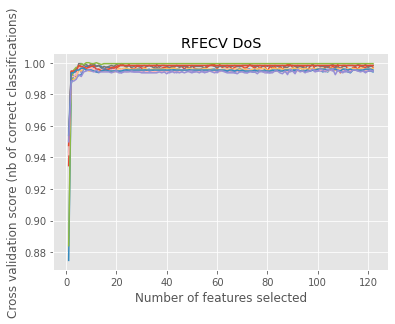

In [ ]:
print(__doc__)

import matplotlib.pyplot as plt
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

# Create the RFE object and compute a cross-validated score.
# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv_DoS = RFECV(estimator=clf_DoS, step=1, cv=10, scoring='accuracy')
rfecv_DoS.fit(X_DoS_test, Y_DoS_test)
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.title('RFECV DoS')
plt.plot(range(1, len(rfecv_DoS.grid_scores_) + 1), rfecv_DoS.grid_scores_)
plt.show()

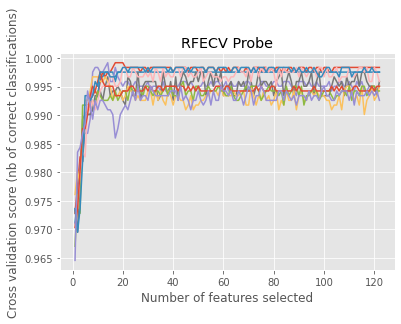

In [ ]:
rfecv_Probe = RFECV(estimator=clf_Probe, step=1, cv=10, scoring='accuracy')
rfecv_Probe.fit(X_Probe_test, Y_Probe_test)
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.title('RFECV Probe')
plt.plot(range(1, len(rfecv_Probe.grid_scores_) + 1), rfecv_Probe.grid_scores_)
plt.show()

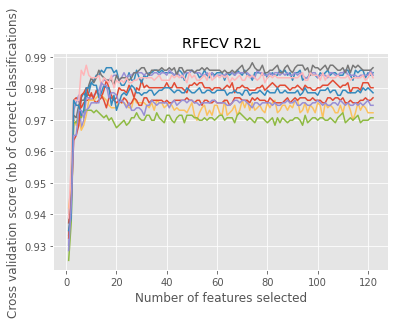

In [ ]:
rfecv_R2L = RFECV(estimator=clf_R2L, step=1, cv=10, scoring='accuracy')
rfecv_R2L.fit(X_R2L_test, Y_R2L_test)
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.title('RFECV R2L')
plt.plot(range(1, len(rfecv_R2L.grid_scores_) + 1), rfecv_R2L.grid_scores_)
plt.show()

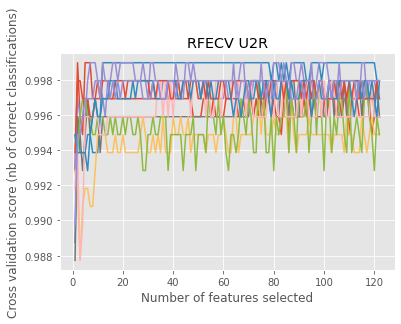

In [ ]:
rfecv_U2R = RFECV(estimator=clf_U2R, step=1, cv=10, scoring='accuracy')
rfecv_U2R.fit(X_U2R_test, Y_U2R_test)
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.title('RFECV U2R')
plt.plot(range(1, len(rfecv_U2R.grid_scores_) + 1), rfecv_U2R.grid_scores_)
plt.show()

Using 13 Features for each category
Confusion Matrices
DoS

In [ ]:
# reduce test dataset to 13 features, use only features described in rfecolname_DoS etc.
X_DoS_test2=X_DoS_test[:,rfecolindex_DoS]
X_Probe_test2=X_Probe_test[:,rfecolindex_Probe]
X_R2L_test2=X_R2L_test[:,rfecolindex_R2L]
X_U2R_test2=X_U2R_test[:,rfecolindex_U2R]
X_U2R_test2.shape

(9778, 13)

In [ ]:
Y_DoS_pred2=clf_rfeDoS.predict(X_DoS_test2)
# Create confusion matrix
pd.crosstab(Y_DoS_test, Y_DoS_pred2, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,1
Actual attacks,,
0,9602,109
1,2625,4835


Probe

In [ ]:
Y_Probe_pred2=clf_rfeProbe.predict(X_Probe_test2)
# Create confusion matrix
pd.crosstab(Y_Probe_test, Y_Probe_pred2, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,2
Actual attacks,,
0,8709,1002
2,944,1477


R2L

In [ ]:
Y_R2L_pred2=clf_rfeR2L.predict(X_R2L_test2)
# Create confusion matrix
pd.crosstab(Y_R2L_test, Y_R2L_pred2, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,3
Actual attacks,,
0,9649,62
3,2560,325


U2R

In [ ]:
Y_U2R_pred2=clf_rfeU2R.predict(X_U2R_test2)
# Create confusion matrix
pd.crosstab(Y_U2R_test, Y_U2R_pred2, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,4
Actual attacks,,
0,9706,5
4,52,15


Cross Validation: Accuracy, Precision, Recall, F-measure
DoS

In [ ]:
accuracy = cross_val_score(clf_rfeDoS, X_DoS_test2, Y_DoS_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(clf_rfeDoS, X_DoS_test2, Y_DoS_test, cv=10, scoring='precision')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(clf_rfeDoS, X_DoS_test2, Y_DoS_test, cv=10, scoring='recall')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(clf_rfeDoS, X_DoS_test2, Y_DoS_test, cv=10, scoring='f1')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))

Accuracy: 0.99738 (+/- 0.00267)
Precision: 0.99692 (+/- 0.00492)
Recall: 0.99705 (+/- 0.00356)
F-measure: 0.99698 (+/- 0.00307)


Probe

In [ ]:
accuracy = cross_val_score(clf_rfeProbe, X_Probe_test2, Y_Probe_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(clf_rfeProbe, X_Probe_test2, Y_Probe_test, cv=10, scoring='precision_macro')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(clf_rfeProbe, X_Probe_test2, Y_Probe_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(clf_rfeProbe, X_Probe_test2, Y_Probe_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))

Accuracy: 0.99085 (+/- 0.00559)
Precision: 0.98674 (+/- 0.01179)
Recall: 0.98467 (+/- 0.01026)
F-measure: 0.98566 (+/- 0.00871)


R2L

In [ ]:
accuracy = cross_val_score(clf_rfeR2L, X_R2L_test2, Y_R2L_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(clf_rfeR2L, X_R2L_test2, Y_R2L_test, cv=10, scoring='precision_macro')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(clf_rfeR2L, X_R2L_test2, Y_R2L_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(clf_rfeR2L, X_R2L_test2, Y_R2L_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))

Accuracy: 0.97459 (+/- 0.00910)
Precision: 0.96689 (+/- 0.01311)
Recall: 0.96086 (+/- 0.01571)
F-measure: 0.96379 (+/- 0.01305)


U2R

In [ ]:
accuracy = cross_val_score(clf_rfeU2R, X_U2R_test2, Y_U2R_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(clf_rfeU2R, X_U2R_test2, Y_U2R_test, cv=10, scoring='precision_macro')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(clf_rfeU2R, X_U2R_test2, Y_U2R_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(clf_rfeU2R, X_U2R_test2, Y_U2R_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))

Accuracy: 0.99652 (+/- 0.00278)
Precision: 0.87538 (+/- 0.15433)
Recall: 0.89540 (+/- 0.14777)
F-measure: 0.87731 (+/- 0.09647)


Stratified CV => Stays the same

In [ ]:
from sklearn.model_selection import StratifiedKFold
accuracy = cross_val_score(clf_rfeDoS, X_DoS_test2, Y_DoS_test, cv=StratifiedKFold(10), scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

accuracy = cross_val_score(clf_rfeProbe, X_Probe_test2, Y_Probe_test, cv=StratifiedKFold(10), scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

accuracy = cross_val_score(clf_rfeR2L, X_R2L_test2, Y_R2L_test, cv=StratifiedKFold(10), scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

accuracy = cross_val_score(clf_rfeU2R, X_U2R_test2, Y_U2R_test, cv=StratifiedKFold(10), scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

Accuracy: 0.99738 (+/- 0.00267)
Accuracy: 0.99085 (+/- 0.00559)
Accuracy: 0.97459 (+/- 0.00910)
Accuracy: 0.99652 (+/- 0.00278)


CV 2, 5, 10, 30, 50 fold
DoS

In [ ]:
accuracy = cross_val_score(clf_rfeDoS, X_DoS_test2, Y_DoS_test, cv=2, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

accuracy = cross_val_score(clf_rfeDoS, X_DoS_test2, Y_DoS_test, cv=5, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

accuracy = cross_val_score(clf_rfeDoS, X_DoS_test2, Y_DoS_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

accuracy = cross_val_score(clf_rfeDoS, X_DoS_test2, Y_DoS_test, cv=30, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

accuracy = cross_val_score(clf_rfeDoS, X_DoS_test2, Y_DoS_test, cv=50, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

Accuracy: 0.99662 (+/- 0.00116)
Accuracy: 0.99709 (+/- 0.00064)
Accuracy: 0.99738 (+/- 0.00267)
Accuracy: 0.99726 (+/- 0.00430)
Accuracy: 0.99703 (+/- 0.00622)


Probe

In [ ]:
accuracy = cross_val_score(clf_rfeProbe, X_Probe_test2, Y_Probe_test, cv=2, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

accuracy = cross_val_score(clf_rfeProbe, X_Probe_test2, Y_Probe_test, cv=5, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

accuracy = cross_val_score(clf_rfeProbe, X_Probe_test2, Y_Probe_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

accuracy = cross_val_score(clf_rfeProbe, X_Probe_test2, Y_Probe_test, cv=30, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

accuracy = cross_val_score(clf_rfeProbe, X_Probe_test2, Y_Probe_test, cv=50, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

Accuracy: 0.99060 (+/- 0.00165)
Accuracy: 0.99093 (+/- 0.00233)
Accuracy: 0.99085 (+/- 0.00559)
Accuracy: 0.99118 (+/- 0.00742)
Accuracy: 0.99085 (+/- 0.01122)


R2L

In [ ]:
accuracy = cross_val_score(clf_rfeR2L, X_R2L_test2, Y_R2L_test, cv=2, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

accuracy = cross_val_score(clf_rfeR2L, X_R2L_test2, Y_R2L_test, cv=5, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

accuracy = cross_val_score(clf_rfeR2L, X_R2L_test2, Y_R2L_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

accuracy = cross_val_score(clf_rfeR2L, X_R2L_test2, Y_R2L_test, cv=30, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

accuracy = cross_val_score(clf_rfeR2L, X_R2L_test2, Y_R2L_test, cv=50, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

Accuracy: 0.97118 (+/- 0.00143)
Accuracy: 0.97388 (+/- 0.00624)
Accuracy: 0.97459 (+/- 0.00910)
Accuracy: 0.97467 (+/- 0.01644)
Accuracy: 0.97523 (+/- 0.01795)


U2R

In [ ]:
accuracy = cross_val_score(clf_rfeU2R, X_U2R_test2, Y_U2R_test, cv=2, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

accuracy = cross_val_score(clf_rfeU2R, X_U2R_test2, Y_U2R_test, cv=5, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

accuracy = cross_val_score(clf_rfeU2R, X_U2R_test2, Y_U2R_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

accuracy = cross_val_score(clf_rfeU2R, X_U2R_test2, Y_U2R_test, cv=30, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

accuracy = cross_val_score(clf_rfeU2R, X_U2R_test2, Y_U2R_test, cv=50, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

Accuracy: 0.99519 (+/- 0.00184)
Accuracy: 0.99714 (+/- 0.00153)
Accuracy: 0.99652 (+/- 0.00278)
Accuracy: 0.99693 (+/- 0.00571)
Accuracy: 0.99662 (+/- 0.00755)
